0. Import bibliotek
1. Wyświetlenie id produktów, o których zostały pobran opinie
2. Wyświetlenie kodu produktu o którym mają zostać przeanalizowane opinie
3. Podstawowe statystyki
4. Histogram częstości ocen w opiniach
5. Wykres udziału rekomendacji w opiniach


In [4]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [5]:
print(*[file.split(".")[0]for file in os.listdir('opinions')], sep="\n")

17469616


In [13]:
product_id = input('Podaj kod produktu: ')
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(',','.')).astype(float)
opinions

,opinion_id,author,recommend,stars,content,pros,cons,opinion_date,purchase_date,up_vote,down_vote
0,3390567,wlad-c,Polecam,5.0,"Duża moc,spokojnie zastępuje mniejsze kolby.",[],[moc],2015-10-29 14:50:59,2015-10-08 21:20:56,4,0
1,17054967,Piotr,Polecam,5.0,"Lekka, mocna (Błyskawicznie się nagrzewa). Wym...",[],[],2023-01-24 14:18:03,2023-01-10 19:11:04,1,0
2,6388218,Natalia,Polecam,5.0,produkt jest w porządku. zgrabna walizeczka d...,[],[],2017-12-23 12:46:51,2017-12-05 12:38:27,1,0
3,4256897,Użytkownik Ceneo,Polecam,5.0,Bardzo wygodna w użytkowaniu i jeszcze przełąc...,[],[],2016-12-04 19:38:10,2016-11-11 21:52:07,0,2
4,17045296,w...i,Polecam,4.5,Lutownicę kupiłem na zspas. Na razie używam je...,[],[],2023-01-20 21:18:36,2023-01-05 12:00:26,1,0
5,14503989,m...k,Polecam,4.5,urzadzenie fajne jedyny mankament to brak cień...,[],"[funkcjonalność, łatwość używania, moc, wytrzy...",2021-05-24 13:05:48,2021-05-19 06:35:07,0,0
6,12366858,Użytkownik Ceneo,Polecam,5.0,Jak na razie lutownica spełnia moje oczekiwani...,[],[],2020-05-07 18:24:19,2020-05-04 18:14:54,1,1
7,15591562,Jan,Polecam,5.0,Ok bardzo dobra szybko się nagrzewa wygodna w...,[],[],2022-01-21 03:23:34,2022-01-05 11:50:11,0,0
8,3500405,gienek,Polecam,4.0,"jak dla mnie dobry produkt ,",[],[],2015-12-29 09:42:54,2015-11-30 10:25:10,2,0
9,14111640,jedlinski777*****,Nie polecam,2.5,Nie wiem dlaczego ale wydaje mi się że od pocz...,"[funkcjonalność, łatwość używania, wytrzymałość]",[moc],2021-03-13 18:34:41,2021-02-25 14:10:13,0,3


In [14]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()
average_stars

4.071428571428571

[Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '13')]

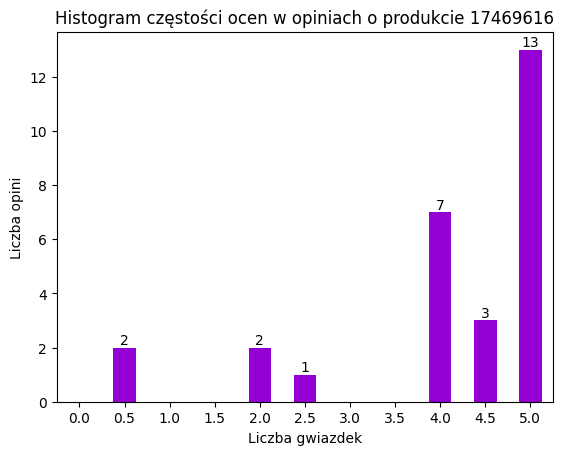

In [28]:
stars_distribution = opinions.stars.value_counts().reindex(np.arange(0,5.1,0.5))
ax = stars_distribution.plot.bar(color="darkviolet")
ax.set_title(f"Histogram częstości ocen w opiniach o produkcie {product_id}")
ax.set_xlabel("Liczba gwiazdek")
ax.set_ylabel("Liczba opini")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if l > 0 else "")


Text(0.5, 1.0, 'Udział rekomendacji w opiniach o produkcie 17469616')

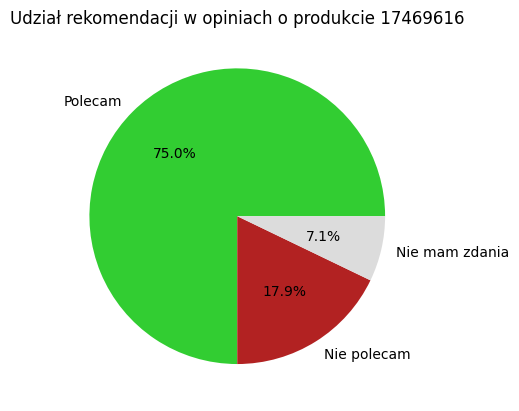

In [39]:
recommend_distribution = opinions.recommend.value_counts(dropna=False).reindex(["Polecam","Nie polecam",None])
recommend_distribution.plot.pie(
    autopct = '%1.1f%%',
    label = "",
    colors = ["limegreen", "firebrick", "gainsboro"],
    labels = ["Polecam","Nie polecam","Nie mam zdania"]
)
plt.title(f"Udział rekomendacji w opiniach o produkcie {product_id}")